In [1]:
import pickle
import matplotlib.pyplot as plt

from cosinorage.dataloaders import DataLoader

In [2]:
reload = False

In [3]:
if reload:
    loader = DataLoader(datasource='smartwatch', input_path='../data/62164/', preprocess=True)
    loader.load_data()
    with open("loader.pkl", "wb") as file:
        pickle.dump(loader, file)
else:
    with open("loader.pkl", "rb") as file:
        loader = pickle.load(file)

In [4]:
data = loader.get_acc_data()

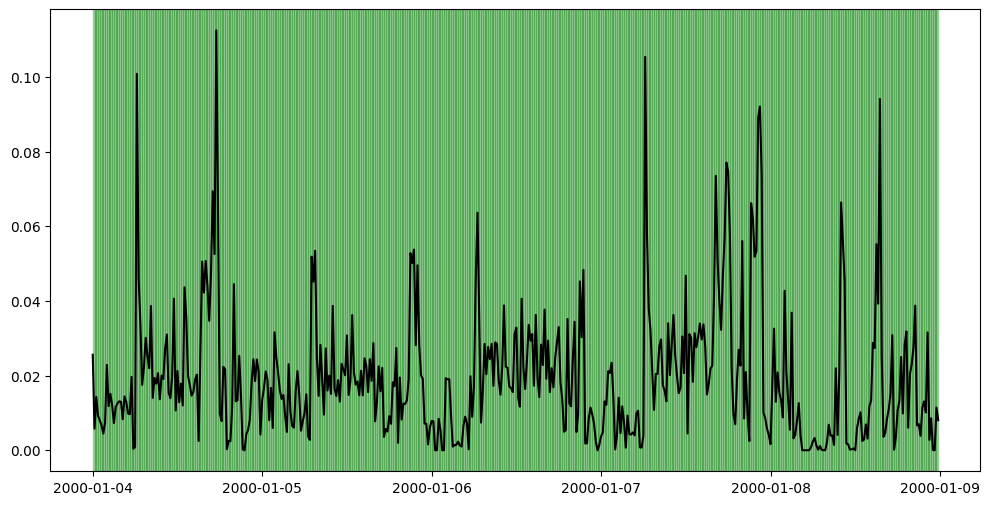

In [5]:
_data = data.resample('15min').mean().reset_index(inplace=False)
# Plotting the ENMO data for the first hour with color bands for wear/non-wear periods
plt.figure(figsize=(12, 6))
plt.plot(_data['TIMESTAMP'], _data['ENMO'], label='ENMO', color='black')

# Add color bands for wear and non-wear periods
for i in range(len(_data) - 1):
    start_time = _data['TIMESTAMP'].iloc[i]
    end_time = _data['TIMESTAMP'].iloc[i + 1]
    color = 'green' if _data['wear'].iloc[i] == 1 else 'red'
    plt.axvspan(start_time, end_time, color=color, alpha=0.3)

plt.show()